In [1]:
import pandas as pd 
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from textblob import Word
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,f1_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

In [2]:
df_train=pd.read_csv(r'train_tweets.csv')
df_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
df_test=pd.read_csv(r'test_tweets.csv')
df_test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [4]:
print("The shape of the train dataframe is {}".format(df_train.shape))
print("The shape of the test dataframe is {}".format(df_test.shape))

The shape of the train dataframe is (31962, 3)
The shape of the test dataframe is (17197, 2)


In [5]:
df_train.isna().sum()

id       0
label    0
tweet    0
dtype: int64

In [6]:
df_train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [7]:
def clean_tweets(tweets):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweets.lower()).split())

In [8]:
df_train['tweet']=df_train['tweet'].apply(clean_tweets)
df_train.head()

,id,label,tweet
0,1,0,when a father is dysfunctional and is so selfi...
1,2,0,thanks for lyft credit i can t use cause they ...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in ur
4,5,0,factsguide society now motivation


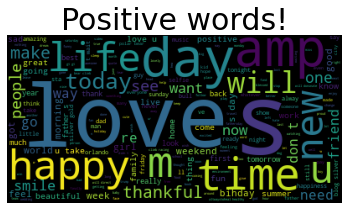

In [9]:
def wordcloud(df):
    tweets=''.join(df['tweet'])    
    wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(tweets)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
df_pos=df_train[df_train['label']==0]
plt.title("Positive words!", fontsize=30)
wordcloud(df_pos)

In [10]:
def lemmatization(df):
    df['tweet']=df['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))    

In [11]:
lemmatization(df_train)

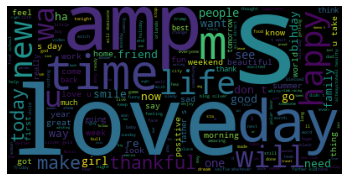

In [12]:
wordcloud(df_train)

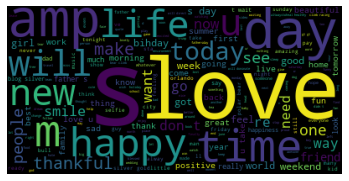

In [13]:
wordcloud(df_pos)

In [14]:
df_train.drop(['id'],axis=1,inplace=True)

In [15]:
df_train.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [16]:
x_train, x_test, y_train, y_test = train_test_split(df_train["tweet"], df_train["label"], test_size = 0.2, random_state = 23)

In [17]:
x_train.shape

(25569,)

In [18]:
x_train.head()

18340    what a camper join our summercamps drive benef...
14123                                father s day somebody
28421    my ex wife is angry that i m happy with my new...
491      aiel aielmaharashtra rude customer care execut...
22741    zoro jrock japan disbanded this is a picture f...
Name: tweet, dtype: object

In [19]:
x_test.head()

27783    congrats guy so proud of your album release today
709                                    so sad one gt gt gt
13362       jo cox an advocate for the syrian refugee news
24551    flagday2016 flag day 2016 30 photo buy thing a...
25642    nzd usd extends rbnz led rally hit fresh 1 yea...
Name: tweet, dtype: object

In [20]:
y_test.head()

27783    0
709      0
13362    0
24551    0
25642    0
Name: label, dtype: int64

In [21]:
countvectors=CountVectorizer(stop_words='english')
x_train_counts=countvectors.fit_transform(x_train)

In [22]:
x_train_counts.shape

(25569, 31585)

In [23]:
transformers=TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_tfids=transformers.fit_transform(x_train_counts)

In [24]:
x_train_tfids.shape

(25569, 31585)

In [25]:
x_test_counts=countvectors.transform(x_test)
x_test_tfids=transformers.transform(x_test_counts)

In [26]:
x_test_tfids.shape

(6393, 31585)

In [27]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train_tfids,y_train)

RandomForestClassifier()

In [28]:
predictions = model.predict(x_test_tfids)
print(predictions)

[0 0 0 ... 0 0 0]


In [29]:
confusion_matrix(y_test,predictions)

array([[5896,   27],
       [ 214,  256]], dtype=int64)

In [30]:
f1_score(y_test,predictions)

0.6799468791500664

In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


In [32]:
df_test['cleaned_tweets'] = df_test['tweet'].apply(clean_tweets)
df_test.head()

,id,tweet,cleaned_tweets
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...
1,31964,@user #white #supremacists want everyone to s...,white supremacists want everyone to see the ne...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your acne altwaystoheal heal...
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",3rd bihday to my amazing hilarious nephew eli ...


In [33]:
lemmatization(df_test)

In [34]:
df_test.drop(['tweet'],axis=1,inplace=True)

In [35]:
df_test

,id,cleaned_tweets
0,31963,studiolife aislife requires passion dedication...
1,31964,white supremacists want everyone to see the ne...
2,31965,safe ways to heal your acne altwaystoheal heal...
3,31966,is the hp and the cursed child book up for res...
4,31967,3rd bihday to my amazing hilarious nephew eli ...
...,...,...
17192,49155,thought factory left right polarisation trump ...
17193,49156,feeling like a mermaid hairflip neverready for...
17194,49157,hillary campaigned today in ohio omg amp used ...
17195,49158,happy at work conference right mindset leads t...


In [38]:
train_counts=countvectors.fit_transform(df_train['tweet'])
test_counts = countvectors.transform(df_test['cleaned_tweets'])

In [39]:
train_tfidfs=transformers.fit_transform(train_counts)
test_tfidfs=transformers.transform(test_counts)

In [40]:
model.fit(train_tfidfs,df_train['label'])

RandomForestClassifier()

In [41]:
predictions = model.predict(test_tfidfs)

In [42]:
predictions 

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)